<h1> Object  Detection Using SSD Mobile Net </h1>

Object detection is a Deep Learning Technology that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos.

In this process we can detect the presence of any still object with much ease. another great thing that can be done with it is that detection of multiple objects in a single frame can be done easily. 
 
 We are uisng SSD MobileNet for object Detection
 
 <img src="./Images/SSD_Mobilenet.png" alt="SSD_Mobilenet" width="500" height="600">
 
 <a href="https://arxiv.org/pdf/1512.02325.pdf">SSD official Paper</a>
 
A key feature of our model is the use of multi-scale convolutional bounding box outputs
attached to multiple feature maps at the top of the network. This representation allows
us to efficiently model the space of possible box shapes

As compared to that of Fast RCN it provides good FPS

<img src="./Images/FPS.JPG" alt="FPS" width="500" height="600">

Here, we are using a model with is pretrained on COCO Data set

<a href="https://cocodataset.org/#home">COCO Data set</a>
 
 COCO is a large-scale object detection, segmentation, and captioning dataset.
 
 The COCO train, validation, and test sets, containing more than 200,000 images and 80 object categories
 
 *1: u'person',
 2: u'bicycle',
 3: u'car',
 4: u'motorcycle',
 5: u'airplane',
 6: u'bus',
 7: u'train',
 8: u'truck',
 9: u'boat',
 10: u'traffic light',
 11: u'fire hydrant',
 12: u'stop sign',
 13: u'parking meter',
 14: u'bench',
 15: u'bird',
 16: u'cat',
 17: u'dog',
 18: u'horse',
 19: u'sheep',
 20: u'cow',
 21: u'elephant',
 22: u'bear',
 23: u'zebra',
 24: u'giraffe',
 25: u'backpack',
 26: u'umbrella',
 27: u'handbag',
 28: u'tie',
 29: u'suitcase',
 30: u'frisbee',
 31: u'skis',
 32: u'snowboard',
 33: u'sports ball',
 34: u'kite',
 35: u'baseball bat',
 36: u'baseball glove',
 37: u'skateboard',
 38: u'surfboard',
 39: u'tennis racket',
 40: u'bottle',
 41: u'wine glass',
 42: u'cup',
 43: u'fork',
 44: u'knife',
 45: u'spoon',
 46: u'bowl',
 47: u'banana',
 48: u'apple',
 49: u'sandwich',
 50: u'orange',
 51: u'broccoli',
 52: u'carrot',
 53: u'hot dog',
 54: u'pizza',
 55: u'donut',
 56: u'cake',
 57: u'chair',
 58: u'couch',
 59: u'potted plant',
 60: u'bed',
 61: u'dining table',
 62: u'toilet',
 63: u'tv',
 64: u'laptop',
 65: u'mouse',
 66: u'remote',
 67: u'keyboard',
 68: u'cell phone',
 69: u'microwave',
 70: u'oven',
 71: u'toaster',
 72: u'sink',
 73: u'refrigerator',
 74: u'book',
 75: u'clock',
 76: u'vase',
 77: u'scissors',
 78: u'teddy bear',
 79: u'hair drier',
 80: u'toothbrush'*

### Import the necessary libraries

In [123]:
! pip install matplotlib

In [124]:
conda update -c conda-forge matplotlib


Note: you may need to restart the kernel to use updated packages.



PackageNotInstalledError: Package is not installed in prefix.
  prefix: c:\users\shrey\appdata\local\continuum\anaconda3\envs\test
  package name: matplotlib




In [125]:
conda update -c conda-forge matplotlib


Note: you may need to restart the kernel to use updated packages.



PackageNotInstalledError: Package is not installed in prefix.
  prefix: c:\users\shrey\appdata\local\continuum\anaconda3\envs\test
  package name: matplotlib




In [126]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')


## Env setup

In [127]:
# This is needed to display the images.
%matplotlib inline

## Object detection imports
Here are the imports from the object detection module.

In [128]:
from utils import label_map_util

from utils import visualization_utils as vis_util

# Model preparation 

## Variables

Here, the trained model is stored in my_model folder. This is trained on COCO dataset

*mscoco_label_map.pbtxt = It provides all the mapping of 80 classes which is used by the model.

We are using City Scape Dataset in order to make the predcition which has following class definations: 
car· truck · bus · on rails· motorcycle · bicycle · caravan · trailer
pole · pole group · traffic sign · traffic light*

In [129]:
# What model to download.
# MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
# MODEL_FILE = MODEL_NAME + '.tar.gz'
# DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# # Path to frozen detection graph. This is the actual model that is used for the object detection.
# PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
MODEL_NAME = 'my_model'
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

In [130]:
PATH_TO_LABELS

'data\\mscoco_label_map.pbtxt'

## Download Model

In [131]:
PATH_TO_FROZEN_GRAPH

'my_model/frozen_inference_graph.pb'

In [132]:
!ls

CONTRIBUTING.md
Images
__init__.py
data
eval_util.py
eval_util_test.py
export_inference_graph.py
export_tflite_ssd_graph.py
export_tflite_ssd_graph_lib.py
export_tflite_ssd_graph_lib_test.py
exporter.py
exporter_test.py
inputs.py
inputs_test.py
model_hparams.py
model_lib.py
model_lib_test.py
model_main.py
model_tpu_main.py
my_model
object_detection_tutorial.ipynb
ssd_mobilenet_v1_coco_2017_11_17.tar.gz
test_data
test_images
utils


## Load a (frozen) Tensorflow model into memory.

In [133]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [134]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

## Helper code

In [135]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [136]:

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [137]:
TEST_IMAGE_PATHS

['test_images\\image1.jpg',
 'test_images\\image2.jpg',
 'test_images\\image3.jpg']

In [138]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [139]:
def test_images(image_path):

#for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  print(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  #%matplotlib inline
  plt.imshow(image_np)

### Getting the Image Path

In [140]:
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 4) ]

In [141]:
TEST_IMAGE_PATHS

['test_images\\image1.jpg',
 'test_images\\image2.jpg',
 'test_images\\image3.jpg']

test_images\image2.jpg


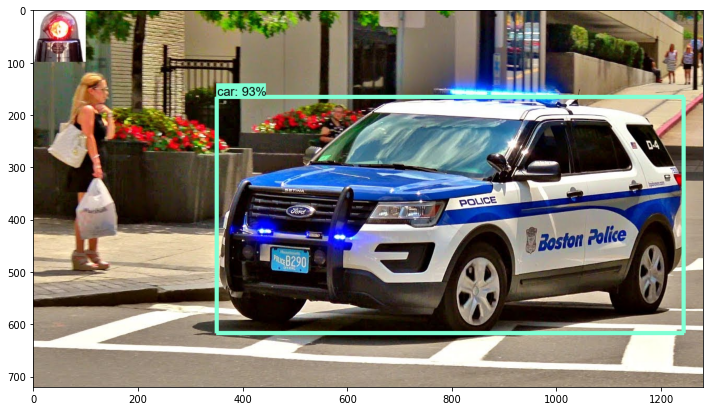

In [143]:
test_images(TEST_IMAGE_PATHS[1])

### Here, we can see that we are able to detect the car with 93% accuracy

In [178]:
temp=['.\\leftImg8bit\\val\\frankfurt\\frankfurt_000000_000294_leftImg8bit.png',
      '.\\leftImg8bit\\val\\frankfurt\\frankfurt_000000_000576_leftImg8bit.png',
      '.\\leftImg8bit\\val\\frankfurt\\frankfurt_000000_001016_leftImg8bit.png',
      '.\\leftImg8bit\\val\\lindau\\lindau_000000_000019_leftImg8bit.png',
      '.\\leftImg8bit\\val\\munster\\munster_000016_000019_leftImg8bit.png',
     ]



.\leftImg8bit\val\frankfurt\frankfurt_000000_000576_leftImg8bit.png


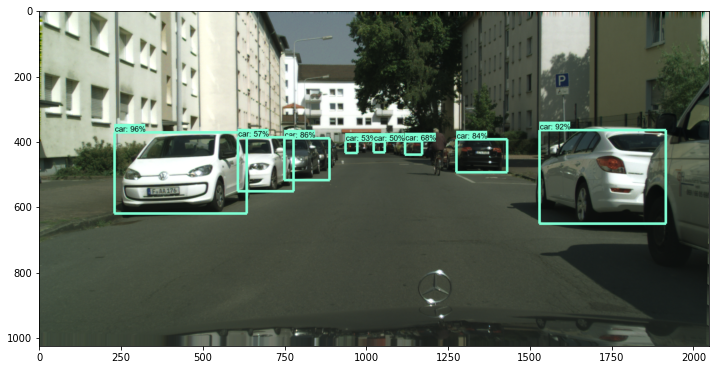

In [180]:
test_images(temp[1])

.\leftImg8bit\val\frankfurt\frankfurt_000000_001016_leftImg8bit.png


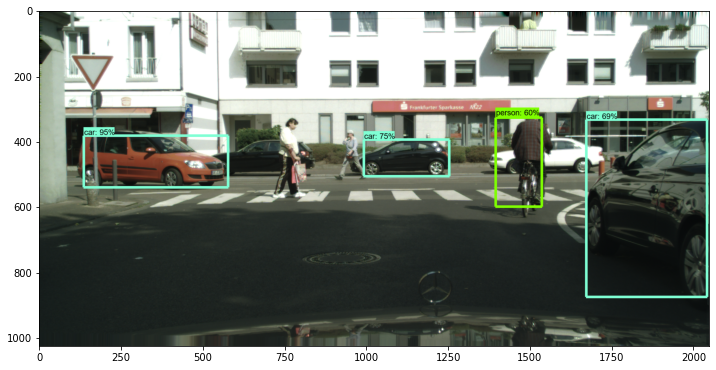

In [181]:
test_images(temp[2])

## Here, we can see that we are able to detect the car and person with good Accuracy

test_images\image3.jpg


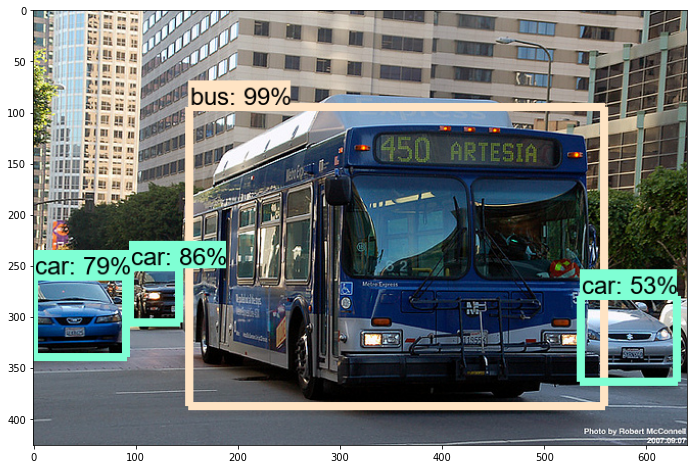

In [182]:
test_images(TEST_IMAGE_PATHS[2])

## Here, we can see that we are able to detect the car and bus with good Accuracy

test_images\image1.jpg


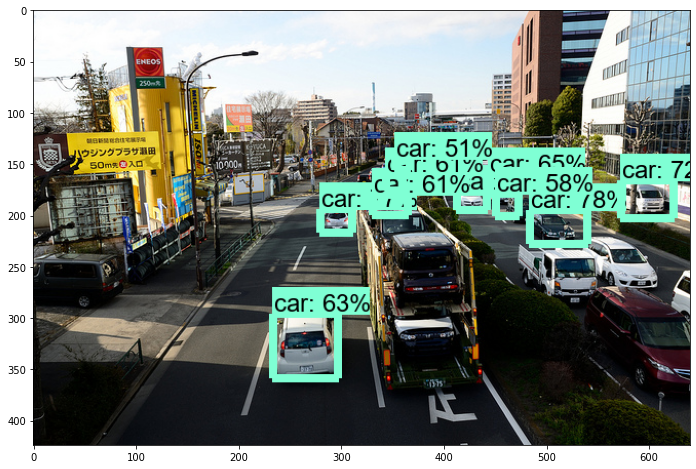

In [183]:
test_images(TEST_IMAGE_PATHS[0])

### Conclusion: 
Here, we have used the model for Ojbect Detection which gives three outputs Bounding Box, Scores, Accuracy. Further, we can see that we are able to predict the items in correct way.
    
### Applications:
 
**Tracking objects**
An item/object detection framework is additionally utilized in tracking the objects, for instance tracking a ball during a match in the football world cup, tracking the swing of a cricket bat, tracking an individual in a video.Object tracking has an assortment of uses, some of which are surveillance and security, traffic checking, video correspondence, robot vision and activity.

**People Counting:**
Counting people is a room 

**CCTV surveillance:**
Security purposes

**Vehicle Detection:**
One can detect the type of the vechicle and the number plate it has. 

**Anomaly detection:**
Anomaly detection is a use case of object detection that’s best explained through specific industry examples.In agriculture, for instance, a custom object detection model could accurately identify and locate potential instances of plant disease, allowing farmers to detect threats to their crop yields that would otherwise not be discernible to the naked human eye.And in health care, object detection could be used to help treat conditions that have specific and unique symptomatic lesions. One such example of this comes in the form of skin care and the treatment of acne—an object detection model could locate and identify instances of acne in seconds.


    
### Disadvantage: 

Consider, We have to use this model for self driving cars or for Medical purposes. We are not able to do so...
   * The reason is that the shape of the car also play a pivotal role. The Model needs the detect the correct shap and pass the details to sensors which helps to guide the car in a proper way.
   <img src="./Images/Segmentation.png" alt="Segmentation" width="500" height="600">
    
* Cancer has long been a deadly illness. Even in today’s age of technological advancements, cancer can be fatal if we don’t identify it at an early stage. Detecting cancerous cell(s) as quickly as possible can potentially save millions of lives.

* The shape of the cancerous cells plays a vital role in determining the severity of the cancer. You might have put the pieces together – object detection will not be very useful here. We will only generate bounding boxes which will not help us in identifying the shape of the cells. 
<img src="./Images/cancer-cell-segmentation.png" alt="cancer-cell-segmentation" width="500" height="600">
